In [13]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import sys
import os
# Add parent directory to path to ensure imports work
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import random
import scipy.special
from collections import Counter
from tree import Tree
from matplotlib import pyplot as plt

In [15]:
# Define stationary probabilities (pi)
pi = np.array([0.5, 0.5])  # Assuming equal base frequencies for binary states

# Define the sequences
sequences = [
    "01001010100101001011",
    "01001010100100010011",
    "01001010100100000011"
]

# Convert sequences to numerical format and validate
num_sequences = []
for seq in sequences:
    num_seq = []
    for base in seq:
        if base not in '01':
            raise ValueError(f"Invalid state '{base}' found in sequence. [only '0' and '1'].")
        num_seq.append(int(base))
    num_sequences.append(num_seq)

# Define the number of leaves for each sequence
num_leaves = [13, 21, 16]

# Create the full sequence array
full_sequences = []
for seq, count in zip(num_sequences, num_leaves):
    full_sequences.extend([seq] * count)

# print("Full Sequences:")
# for seq in full_sequences:
#     print(seq)

# Initialize the tree
sample_size = 50
n_states = 2  # For example, binary states
my_tree = Tree(sample_size, n_states=n_states, sequences=full_sequences)


In [16]:
def compute_log_likelihood_for_thetas(tree, theta_values, pi):
    log_likelihoods = []

    for theta in theta_values:
        # Calculate the log likelihood with the given mutation rate (theta)
        log_likelihood = tree.compute_log_likelihood(theta, pi)
        log_likelihoods.append(log_likelihood)

    return log_likelihoods


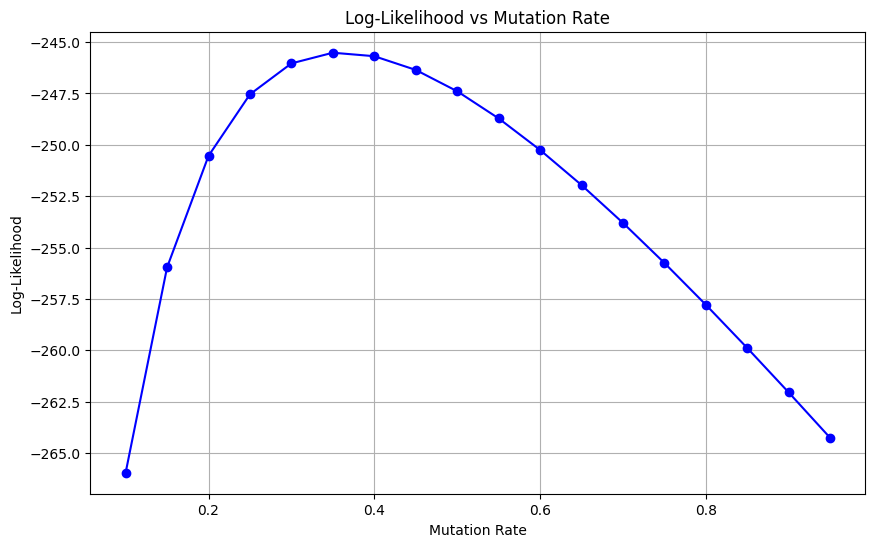

In [17]:
# Define theta values to test
theta_values = np.arange(0.1, 1.0, 0.05)
# Compute log likelihoods for thetas
log_likelihoods = compute_log_likelihood_for_thetas(my_tree, theta_values, pi)


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(theta_values, log_likelihoods, marker='o', linestyle='-', color='b')
plt.xlabel('Mutation Rate')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs Mutation Rate')
plt.grid(True)
plt.show()
